# Linear Regression from scratch
In this project I will be implementing a non-vectorized and vectorized version of simple Linear Regression using stochastic Gradient Descent.

In [420]:
import numpy as np

## Non-Vectorized

In [ ]:
class LinearRegressionNonVectorized():
    pass

## Vectorized

In [ ]:
class LinearRegressionVectorized():
    def __init__(self):
        pass

    def predict_vec(self, X, weights, bias):
        return bias + X@weights

    def predict_vec_sample(self, sample, weights, bias):
        return bias + sample@weights

### Prediction Function for Regression - hθ(x)

In [ ]:
# Non-vectorized
def predict_non_vec(sample, weights, bias):
    wx = 0
    for i in range(len(sample)):
        wx += sample[i] * weights[i]
    
    return bias + wx

# Vectorized
def predict_vec(X, weights, bias):
    return bias + X@weights

def predict_vec_sample(sample, weights, bias):
    return bias + sample@weights

### Loss Function for Regression - J(θ)

In [411]:
# Non-vectorized
def loss_non_vec(X, y, weights, bias):
    n = len(X)
    
    errors = 0
    for i in range(n):
        error = predict_non_vec(X[i, :], weights, bias) - float(y[i])
        mse = error**2
        errors += mse
    
    return (1/(2*n)) * errors

# Vectorized
def loss_vec(X, y, weights, bias):
    predictions = predict_vec(X, weights, bias)
    errors = predictions - y
    mse = errors**2

    return (1/(2*len(y))) * np.sum(mse)

## Application: Housing Price Prediction

### Data Preparation
We will start by preparing our data. Let's first understand how the dataset is structured:

In [412]:
from sklearn.datasets import fetch_california_housing
import numpy as np

data = fetch_california_housing()

print(data.feature_names)

for i in range(5):
    print(list(round(float(j), 3) for j in list(data.data[i])))
    print(data.target[i])

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
[8.325, 41.0, 6.984, 1.024, 322.0, 2.556, 37.88, -122.23]
4.526
[8.301, 21.0, 6.238, 0.972, 2401.0, 2.11, 37.86, -122.22]
3.585
[7.257, 52.0, 8.288, 1.073, 496.0, 2.802, 37.85, -122.24]
3.521
[5.643, 52.0, 5.817, 1.073, 558.0, 2.548, 37.85, -122.25]
3.413
[3.846, 52.0, 6.282, 1.081, 565.0, 2.181, 37.85, -122.25]
3.422


Now we will normalize the features to zero mean and unit variance

In [413]:
X_raw = data.data # get features
y_raw = data.target # get target values

mean = np.mean(X_raw, axis=0)
std = np.std(X_raw, axis=0)

X_norm = (X_raw - mean) / std # center values around 0 and scale values down

And shuffle the data

In [414]:
num_samples = X_norm.shape[0] # get number of samples in X

np.random.seed(101) # set random seed for reproducability
permutation = np.random.permutation(num_samples) # get array of integers up to number of samples in X in random order for shuffling

X_shuf = X_norm[permutation] # reordering using np indexing
y_shuf = y_raw[permutation] # reordering using np indexing

Before splitting it into test, train and validation sets

In [415]:
train_end = int(0.7 * num_samples)
test_end = train_end + int(0.15 * num_samples)

X_train = X_shuf[:train_end]
y_train = y_shuf[:train_end]

X_test = X_shuf[train_end:test_end]
y_test = y_shuf[train_end:test_end]

X_val = X_shuf[test_end:]
y_val = y_shuf[test_end:]

### Gradient Descent
Here we initialize weights and bias for training:

In [416]:
# Initialize random weights and bias between -1 and 1 for the vectorized and non-vectorized approaches 
num_features = X_train.shape[1]

np.random.seed(101)

v_weights = np.random.uniform(-1, 1, num_features)
v_bias = np.random.uniform(-1, 1)

nv_weights = list(float(w) for w in v_weights)
nv_bias = float(v_bias)

#### Non-Vectorized Gradient Descent

In [417]:
# Gradient Descent algorithm
def gradient_descent_non_vec(X, y):
    global nv_weights
    global nv_bias

    # Initialize batches
    # batch_size = len(X) # batch GD
    batch_size = 16 # mini-batch GD
    # batch_size = 1 # stochastic GD

    num_batches = (len(X) // batch_size) + 1 if (len(X) % batch_size != 0) else len(X) // batch_size

    for batch in range(1, num_batches+1):
        batch_X = X[(batch-1)*batch_size:batch*batch_size]
        batch_y = y[(batch-1)*batch_size:batch*batch_size]

        # Initialize the gradients for weights and bias
        gradient_w = [0] * num_features
        gradient_b = 0

        # Calculate the gradients
        n = len(batch_X)
        for i in range(n):
            prediction = predict_non_vec(batch_X[i, :], nv_weights, nv_bias)
            error = prediction - batch_y[i]

            for j in range(num_features):
                gradient_w[j] += error * batch_X[i, :][j]
            gradient_b += error

        # Update the weights and bias
        for j in range(num_features):
            nv_weights[j] = nv_weights[j] - learning_rate * ((1/n) * gradient_w[j])
        nv_bias = nv_bias - learning_rate * ((1/n) * gradient_b)


# Training 
epoch_number = 300
learning_rate = 0.001

loss_history_non_vec = [] # for comparing results later

np.random.seed(101)
samples = np.random.randint(0, len(X_train), 5)

for i in range(epoch_number):
    gradient_descent_non_vec(X_train, y_train)

    # Save loss for result comparison
    loss_history_non_vec.append(loss_non_vec(X_train, y_train, nv_weights, nv_bias))

    # Track loss every 100 epochs and print sample predictions
    if i % 50 == 0:
        print(f"Loss: {loss_non_vec(X_train, y_train, nv_weights, nv_bias)}", end="\n-------------------\n")

        for j in range(len(samples)):
            p = round(predict_non_vec(X_train[samples[j]], nv_weights, nv_bias), 4)
            tv = round(y_train[samples[j]], 4)
            diff = round(tv - p, 4)
            print(f"Prediction: {p}   |   True value: {tv}   |   Difference: {diff}")
        
        print("\n-------------------")

Loss: 0.6616157804230793
-------------------
Prediction: 1.3694   |   True value: 1.238   |   Difference: -0.1314
Prediction: 3.0668   |   True value: 2.935   |   Difference: -0.1318
Prediction: 1.7089   |   True value: 2.854   |   Difference: 1.1451
Prediction: 0.5683   |   True value: 1.549   |   Difference: 0.9807
Prediction: 2.0523   |   True value: 2.413   |   Difference: 0.3607

-------------------
Loss: 0.2608455998585481
-------------------
Prediction: 1.5199   |   True value: 1.238   |   Difference: -0.2819
Prediction: 4.2269   |   True value: 2.935   |   Difference: -1.2919
Prediction: 2.1348   |   True value: 2.854   |   Difference: 0.7192
Prediction: 0.1547   |   True value: 1.549   |   Difference: 1.3943
Prediction: 2.9343   |   True value: 2.413   |   Difference: -0.5213

-------------------
Loss: 0.26057302546474326
-------------------
Prediction: 1.5304   |   True value: 1.238   |   Difference: -0.2924
Prediction: 4.2016   |   True value: 2.935   |   Difference: -1.2666

#### Vectorized Gradient Descent

In [418]:
loss_history_vec = []

# Gradient Descent algorithm
def gradient_descent_vec(X, y):
    global v_weights
    global v_bias

    predictions = predict_vec(X, v_weights, v_bias)
    errors = predictions - y

    # Initialize batches
    # batch_size = len(X) # batch GD
    batch_size = 16 # mini-batch GD
    # batch_size = 1 # stochastic GD

    num_batches = (len(X) // batch_size) + 1 if (len(X) % batch_size != 0) else len(X) // batch_size
    
    for batch in range(1, num_batches+1):
        batch_X = X[(batch-1)*batch_size:batch*batch_size]
        batch_errors = errors[(batch-1)*batch_size:batch*batch_size]

        m = len(batch_X)
        gradient_w = (1/m) * batch_X.T@batch_errors # use X transposed
        gradient_b = (1/m) * np.sum(batch_errors)

        v_weights = v_weights - learning_rate * gradient_w
        v_bias = v_bias - learning_rate * gradient_b


# Training 
epoch_number = 500
learning_rate = 0.001

np.random.seed(101)
samples = np.random.randint(0, len(X_train), 5)

for i in range(epoch_number):
    gradient_descent_vec(X_train, y_train)

    loss_history_vec.append(loss_vec(X_train, y_train, v_weights, v_bias))

    # Track loss every 100 epochs and print sample predictions
    if i % 100 == 0:
        print(f"Loss: {loss_vec(X_train, y_train, v_weights, v_bias)}", end="\n-------------------\n")

        for j in range(len(samples)):
            p = round(predict_vec_sample(X_train[samples[j]], v_weights, v_bias), 4)
            tv = round(y_train[samples[j]], 4)
            diff = round(tv - p, 4)
            print(f"Prediction: {p}   |   True value: {tv}   |   Difference: {diff}")
        
        print("\n-------------------")



Loss: 1.3622826084210242
-------------------
Prediction: -0.573   |   True value: 1.238   |   Difference: 1.811
Prediction: 4.0223   |   True value: 2.935   |   Difference: -1.0873
Prediction: 1.175   |   True value: 2.854   |   Difference: 1.679
Prediction: 1.6442   |   True value: 1.549   |   Difference: -0.0952
Prediction: 2.3051   |   True value: 2.413   |   Difference: 0.1079

-------------------
Loss: 0.26055881198902064
-------------------
Prediction: 1.5336   |   True value: 1.238   |   Difference: -0.2956
Prediction: 4.2052   |   True value: 2.935   |   Difference: -1.2702
Prediction: 2.1406   |   True value: 2.854   |   Difference: 0.7134
Prediction: 0.1128   |   True value: 1.549   |   Difference: 1.4362
Prediction: 2.9398   |   True value: 2.413   |   Difference: -0.5268

-------------------
Loss: 0.2605557188985912
-------------------
Prediction: 1.535   |   True value: 1.238   |   Difference: -0.297
Prediction: 4.2018   |   True value: 2.935   |   Difference: -1.2668
Pred

### Comparison
Let us check whether or not the vectorized and the loop-based gradient descent implementations produce the same results:

In [419]:
for i in range(0, len(loss_history_vec), 100):
    loss_non_vec = loss_history_non_vec[i]
    loss_vec = loss_history_vec[i]
    
    print(f"Loss (Non-Vectorized): {loss_non_vec}   |   Loss (Vectorized): {loss_vec}   |   Difference: {loss_non_vec - loss_vec}")

Loss (Non-Vectorized): 0.6616157804230793   |   Loss (Vectorized): 1.3622826084210242   |   Difference: -0.7006668279979449
Loss (Non-Vectorized): 0.26057302546474326   |   Loss (Vectorized): 0.26055881198902064   |   Difference: 1.4213475722613111e-05
Loss (Non-Vectorized): 0.26057079117434895   |   Loss (Vectorized): 0.2605557188985912   |   Difference: 1.5072275757754827e-05


IndexError: list index out of range

As we can see, the difference between the loss for the non-vectorized and the vectorized gradient descent is 0. 

Because the calculation of the loss also uses the respective prediction function (meaning we cover both prediction, loss and gradient descent) we can be pretty sure that no difference in loss means that the vectorized and loop-based versions produce the same results (also manually confirmable by comparing the prediction samples above).

Let us now compare the efficiency of the two training algorithms:

In [ ]:
from time import time

test_epoch_number = 100
test_times = 10

# Non-Vectorized
dur_nv = 0
for _ in range(test_times):
    start_time = time()
    for _ in range(epoch_number):
        gradient_descent_non_vec(X_train, y_train)
    dur_nv += time() - start_time

print(f"Average non-vectorized gradient descent duration for 100 epochs (in seconds): {round(dur_nv/test_times, 4)}")

# Vectorized
dur_v = 0
for _ in range(test_times):
    start_time = time()
    for i in range(epoch_number):
        gradient_descent_vec(X_train, y_train)
    dur_v += time() - start_time

print(f"Average vectorized gradient descent duration for 100 epochs (in seconds): {round(dur_v/test_times, 4)}")

print(f"The vectorized approach is around {round(dur_nv / dur_v)} times faster than the non-vectorized one.")

Average non-vectorized gradient descent duration for 100 epochs (in seconds): 997.5718
Average vectorized gradient descent duration for 100 epochs (in seconds): 0.2338
The vectorized approach is around 4267 times faster than the non-vectorized one.


### Plotting and Evaluation
We will now plot our results using matplotlib. Let's start by plotting the traing loss vs. the number of epochs:

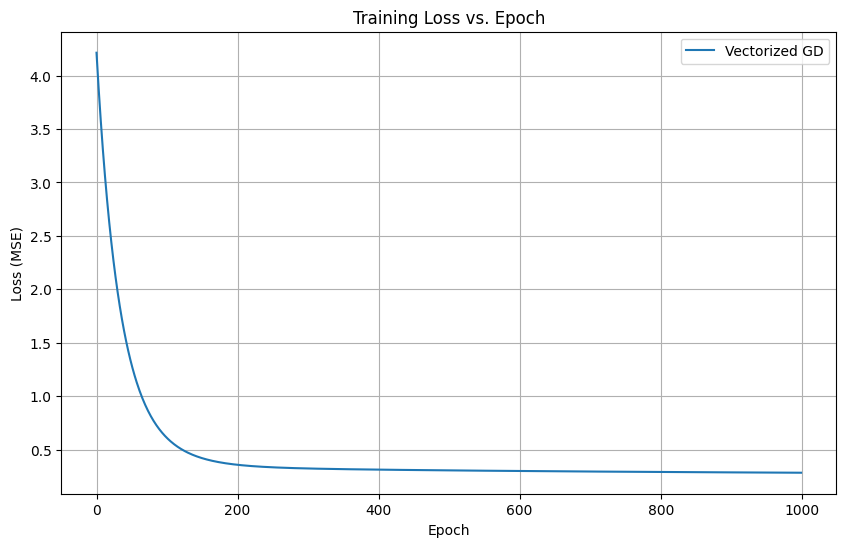

In [ ]:
from matplotlib import pyplot as plt

x = list(range(epoch_number))
y_v = loss_history_vec

plt.figure(figsize=(10, 6))
plt.plot(x, y_v, label="Vectorized GD")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss vs. Epoch")
plt.legend()
plt.grid()
plt.show()

Now we will plot the predicted values vs the actual values for our validation and test sets:

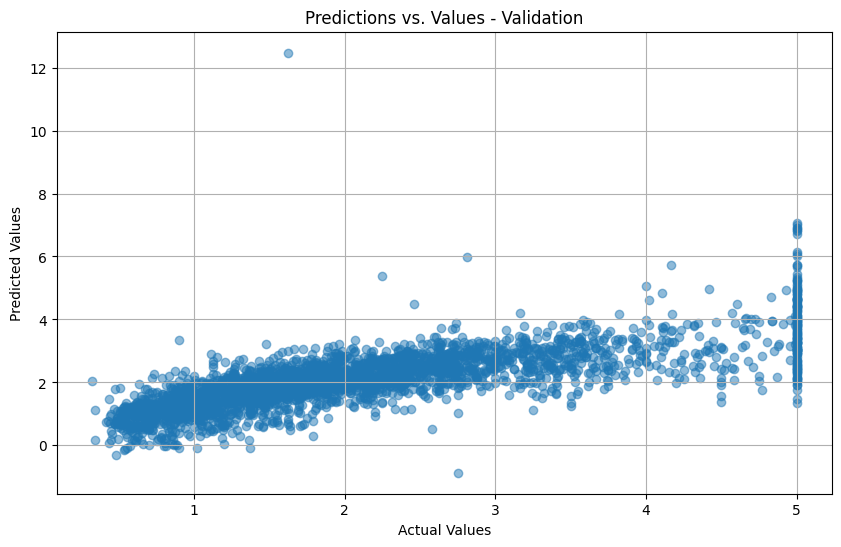

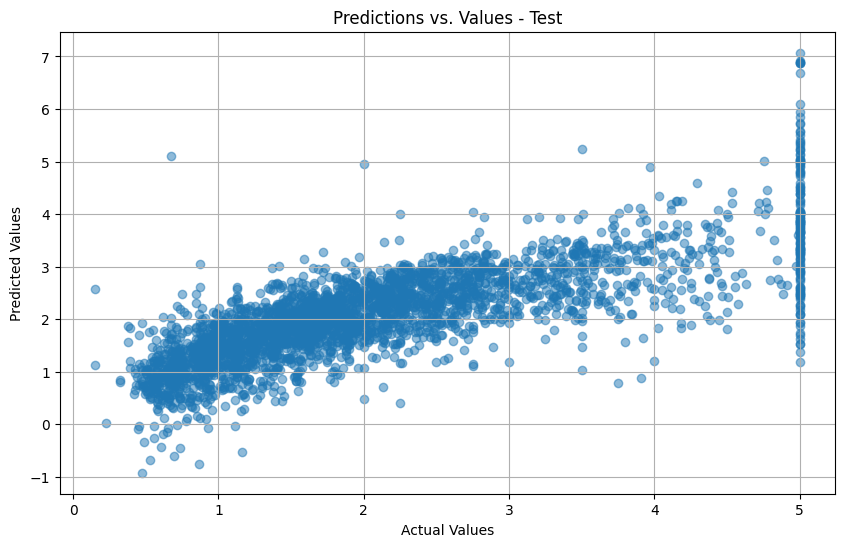

In [ ]:
# Get predictions
val_predictions = predict_vec(X_val, v_weights, v_bias)
test_predictions = predict_vec(X_test, v_weights, v_bias)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_val, val_predictions, alpha=0.5)
plt.title("Predictions vs. Values - Validation")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.title("Predictions vs. Values - Test")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

Lastly, let's calculate the MSE for our validation and test sets and compare it between our non-vectorized and our vectorized approach

In [ ]:
# Function for mse
def mse_v(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Get predictions for non-vectorized approach
y_val_pred = []
for i in range(len(y_val)):
    y_val_pred.append(predict_non_vec(X_val[i, :], nv_weights, nv_bias))

y_test_pred = []
for i in range(len(y_test)):
    y_test_pred.append(predict_non_vec(X_test[i, :], nv_weights, nv_bias))

# Calculate mse
nv_mse_val = mse_v(y_val, y_val_pred)
nv_mse_test = mse_v(y_test, y_test_pred)

v_mse_val = mse_v(y_val, val_predictions)
v_mse_test = mse_v(y_test, test_predictions)

# Compare mse
print(f"Validation MSE (Non-Vectorized GD): {round(nv_mse_val, 4)}")
print(f"Validation MSE (Vectorized GD): {round(v_mse_val, 4)}")
print(f"Difference: {nv_mse_val - v_mse_val}")
print("-------------------------------------")
print(f"Test MSE (Non-Vectorized GD): {round(nv_mse_test, 4)}")
print(f"Test MSE (Vectorized GD): {round(v_mse_test, 4)}")
print(f"Difference: {nv_mse_test - v_mse_test}")

Validation MSE (Non-Vectorized GD): 0.552
Validation MSE (Vectorized GD): 0.552
Difference: 0.0
-------------------------------------
Test MSE (Non-Vectorized GD): 0.5271
Test MSE (Vectorized GD): 0.5271
Difference: 0.0
